In [4]:
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
casas=["1xBet","10x10bet","Alphabet","bet-at-home","bet365","BetInAsia","GGBET","Lasbet","Marsbet","Pinnacle","Unibet","VOBET","Vulkan Bet","William Hill"]
rankings_fifa_2022=[
    ('Netherlands', 8), 
    ('Senegal', 18), 
    ('Ecuador', 44), 
    ('Qatar', 50),
    ('England', 5), 
    ('U.S.', 16), 
    ('Wales', 19), 
    ('Iran', 20),
    ('Argentina', 3),
    ('Mexico', 13),
    ('Poland', 26),
    ('Saudi Arabia', 51),
    ('France', 4),
    ('Denmark', 10),
    ('Tunisia', 30),
    ('Australia', 38),
    ('Spain', 7),
    ('Germany', 11),
    ('Japan', 24),
    ('Costa Rica', 31),
    ('Belgium', 2),
    ('Croatia', 12),
    ('Morocco', 22),
    ('Canada', 41),
    ('Brazil', 1),
    ('Switzerland', 15),
    ('Serbia', 21),
    ('Cameroon', 43),
    ('Portugal', 9),
    ('Uruguay', 14),
    ('South Korea', 28),
    ('Ghana', 61)]
rankings_fifa_2018=[
    ("Germany", 1),
    ("Brazil", 2),
    ("Belgium", 3),
    ("Portugal", 4),
    ("Argentina", 5),
    ("Switzerland", 6),
    ("France", 7),
    ("Poland", 8),
    ("Spain", 10),
    ("Peru", 11),
    ("Denmark", 12),
    ("England", 13),
    ("Mexico", 14),
    ("Colombia", 15),
    ("Uruguay", 17),
    ("Croatia", 18),
    ("Tunisia", 21),
    ("Iceland", 22),
    ("Costa Rica", 23),
    ("Sweden", 24),
    ("Senegal", 28),
    ("Serbia", 34),
    ("Australia", 36),
    ("Iran", 37),
    ("Nigeria", 48),
    ("Morocco", 42),
    ("Japan", 61),
    ("South Korea", 57),
    ("Saudi Arabia", 67),
    ("Russia", 70),
    ("Panama", 55)
]

In [6]:
rankings_fifa_2022.sort(key=lambda x:x[1])
superiores_2018=[]
superiores_2022=[]
for i in range(8): 
    superiores_2022.append(rankings_fifa_2022[i][0])
    superiores_2018.append(rankings_fifa_2018[i][0])
    print(rankings_fifa_2022[i],rankings_fifa_2018[i])

('Brazil', 1) ('Germany', 1)
('Belgium', 2) ('Brazil', 2)
('Argentina', 3) ('Belgium', 3)
('France', 4) ('Portugal', 4)
('England', 5) ('Argentina', 5)
('Spain', 7) ('Switzerland', 6)
('Netherlands', 8) ('France', 7)
('Portugal', 9) ('Poland', 8)


In [12]:
def explotar(casa,paises_rank,cuotas_pais,dic_infra,dic_sobre):
    
    equipos_infra=[]
    equipos_sobre=[]

    for i in cuotas_pais:
    
        a_priori=1
        a_posteriori=1

        for j in cuotas_pais[i][casa]:
            a_priori*=j[0]
            a_posteriori*=j[1]

        if(a_posteriori<a_priori): equipos_infra.append((i,a_priori,a_posteriori))
        else: equipos_sobre.append((i,a_priori,a_posteriori))

    #Sortear por profit o loss
    monto=1
    dinero=0
    
    for i in equipos_infra:
        
        dic_infra[i[0][0:3]]+=1
        prob_real=1/i[2]
        diff=prob_real*(i[1]-1)*monto-(1-prob_real)*monto

        if(i[0] not in paises_rank): dinero=diff+dinero
    
    #print(dinero)
    
    sort_perder=[]
    
    for i in equipos_sobre:

        prob_real=1/i[2]
        diff=prob_real*(i[1]-1)*monto-(1-prob_real)*monto
        sort_perder.append((i[0],diff))
        
        if(i[0] not in paises_rank): dinero=diff+dinero
            
    sort_perder.sort(key=lambda x:x[1])
    print("-"*50)
    for i in range(10): 
        dic_sobre[sort_perder[i][0][0:3]]+=1
        print(sort_perder[i])
    print(dinero)
    #for i in cuotas_pais["Costa Rica"]:
        #print(cuotas_pais["Costa Rica"][i])
    print("-"*50)
    
    return dinero

In [13]:
def analisis(year,paises_rank):
    
    df_general=pd.read_csv(f"./data_{year}/todo.csv")
    df_casas={}
    dic_infra=defaultdict(lambda:0)
    dic_sobre=defaultdict(lambda:0)
    cuotas_pais=defaultdict(lambda:defaultdict(lambda:[]))
    casas_validas=defaultdict(lambda:1)
    sumar=0
    
    for i in casas:
        try: df_casas[i]=pd.read_csv(f"./data_{year}/{i}.csv")
        except: casas_validas[i]=0

    for index,rows in df_general.iterrows():
    
        if(rows["tipo"]=="Groups"):

            pais_a=rows["pais_a"]
            pais_b=rows["pais_b"]
            encuentro=rows["encuentro"]

            #print(encuentro)
            sumar+=1
            
            max_0=[1,""]
            max_x=[1,""]
            max_1=[1,""]
            
            for i in casas:

                #print(odds_casa)
                try:
                
                    odds_casa=df_casas[i][df_casas[i]["encuentro"]==encuentro]
                    casas_validas[i]=1*casas_validas[i]
                    cuotas_pais[pais_a][i].append((odds_casa["inicial_0"].values[0],odds_casa["final_1"].values[0]))
                    cuotas_pais[pais_b][i].append((odds_casa["inicial_1"].values[0],odds_casa["final_2"].values[0]))
                

                    if(max_0[0]<odds_casa["inicial_0"].values[0]):
                        max_0[0]=odds_casa["inicial_0"].values[0]
                        max_0[1]=i
                        
                    if(max_x[0]<odds_casa["inicial_x"].values[0]):
                        max_x[0]=odds_casa["inicial_x"].values[0]
                        max_x[1]=i

                    if(max_1[0]<odds_casa["inicial_1"].values[0]):
                        max_1[0]=odds_casa["inicial_1"].values[0]
                        max_1[1]=i

                
                except Exception as e:
                    #print(e)
                    #print(f"La casa {i}, no saco cuota para el partido {encuentro}")
                    casas_validas[i]=0*casas_validas[i]
            
            arb=1/max_0[0]+1/max_1[0]+1/max_x[0]
            if(arb<1):
                print(f"Arbitrage en {encuentro}, {arb}, {max_0[1]}-{max_0[0]}, {max_x[1]}-{max_x[0]}, {max_1[1]}-{max_1[0]}")
                    
    avg=0
    validas=0
    
    for i in casas_validas:
        if(casas_validas[i]==1):
            validas+=1
            print("-"*50)
            print(i)   
            avg+=explotar(i,paises_rank,cuotas_pais,dic_infra,dic_sobre)
            print("-"*50)
    print("Media",avg/validas)

    paises_x = list(dic_infra.keys())
    values_y = list(dic_infra.values())

    plt.figure(figsize=(12, 8))  # Set the figure size
    plt.title("Infravalorados")  # Set the title
    plt.bar(paises_x, values_y, color='skyblue', edgecolor='black')  # Create the bar chart
    plt.show()
    
    plt.figure(figsize=(12, 8))  # Set the figure size
    plt.title("Sobrevalorados")  # Set the title
    plt.bar(list(dic_sobre.keys()), list(dic_sobre.values()), color='skyblue', edgecolor='black')  # Create the bar chart
    plt.show()
    
    for i in dic_infra:
        if(dic_infra[i]>=5): print(i)

Arbitrage en cameroon-brazil, 0.9324675324675324, William Hill-15.0, Marsbet-6.6, Vulkan Bet-1.4
Arbitrage en serbia-switzerland, 0.9755021276136655, Lasbet-2.89, Lasbet-3.47, Vulkan Bet-2.93
Arbitrage en ghana-uruguay, 0.9749084034680899, 1xBet-5.65, Vulkan Bet-3.8, Unibet-1.87
Arbitrage en south-korea-portugal, 0.8418010752688172, Lasbet-9.6, Lasbet-5.0, Vulkan Bet-1.86
Arbitrage en costa-rica-germany, 0.874162296037296, Marsbet-26.0, Vulkan Bet-12.8, Lasbet-1.32
Arbitrage en japan-spain, 0.9346654487325874, 10x10bet-10.0, Lasbet-5.8, Vulkan Bet-1.51
Arbitrage en canada-morocco, 0.8694563096556451, Vulkan Bet-4.9, Vulkan Bet-3.6, BetInAsia-2.58
Arbitrage en croatia-belgium, 0.882780435306671, 1xBet-4.24, Lasbet-3.77, Vulkan Bet-2.62
Arbitrage en poland-argentina, 0.911297852474323, William Hill-8.5, William Hill-4.5, Pinnacle-1.75
Arbitrage en saudi-arabia-mexico, 0.9654686398872445, Lasbet-6.6, 1xBet-4.3, Alphabet-1.72
Arbitrage en australia-denmark, 0.9512628899621459, Unibet-8.0, 

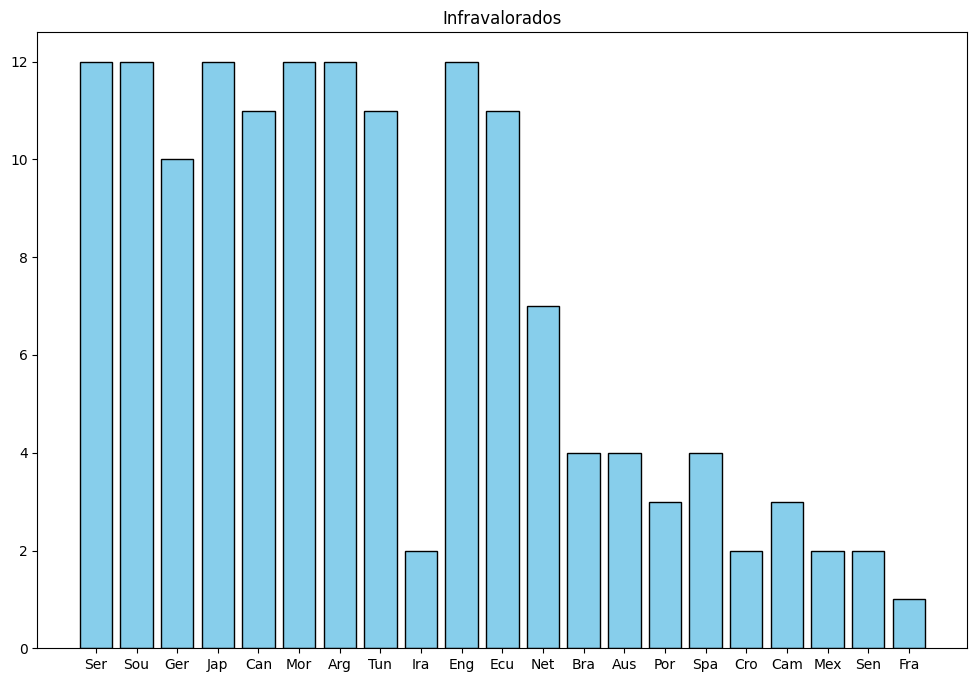

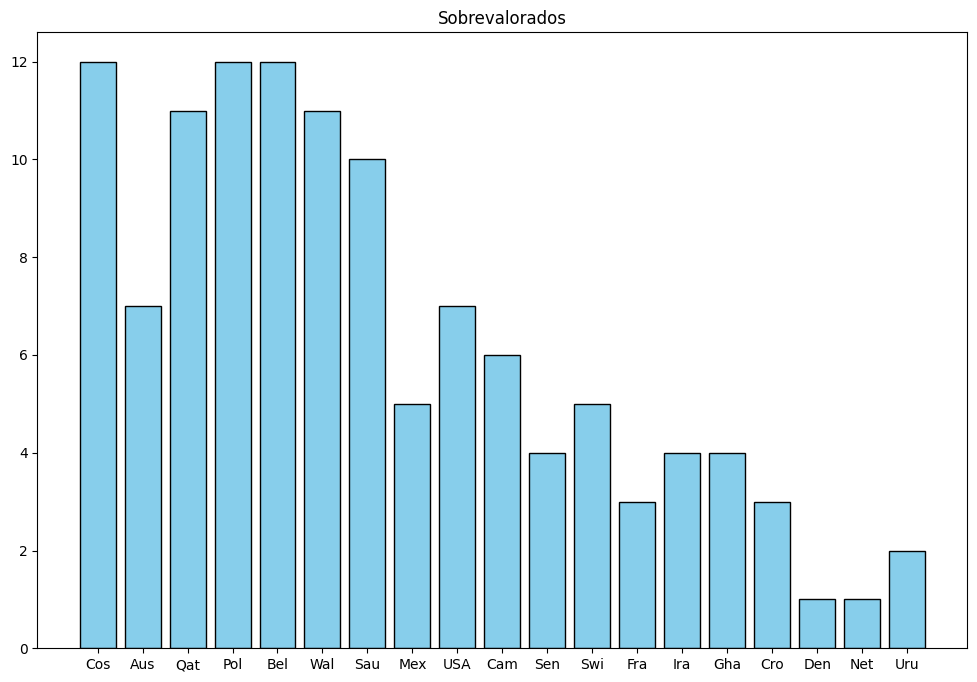

Ser
Sou
Ger
Jap
Can
Mor
Arg
Tun
Eng
Ecu
Net


In [14]:
analisis(2022,superiores_2022)

--------------------------------------------------
1xBet
--------------------------------------------------
('Costa Rica', -0.711747663551402)
('Poland', -0.6956421425510839)
('Panama', -0.5272775423728813)
('Sweden', -0.5101890308473037)
('Iceland', -0.4722127249643622)
('Egypt', -0.4204878048780487)
('Nigeria', -0.4186486806295112)
('South Korea', -0.3566024670145126)
('Iran', -0.3420773152081562)
('Australia', -0.3203394706559263)
1.9869483659520548
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
bet-at-home
--------------------------------------------------
('Costa Rica', -0.6798795294117648)
('South Korea', -0.647477081592871)
('Panama', -0.5809301038062283)
('Poland', -0.5428269069705806)
('France', -0.3627333333333333)
('Sweden', -0.3566343840822712)
('Belgium', -0.34866929466275887)
('Saudi Arabia', -0.33990644932671876)
('Egypt', -0.30084943089430904)
('Senegal', -0.2647227

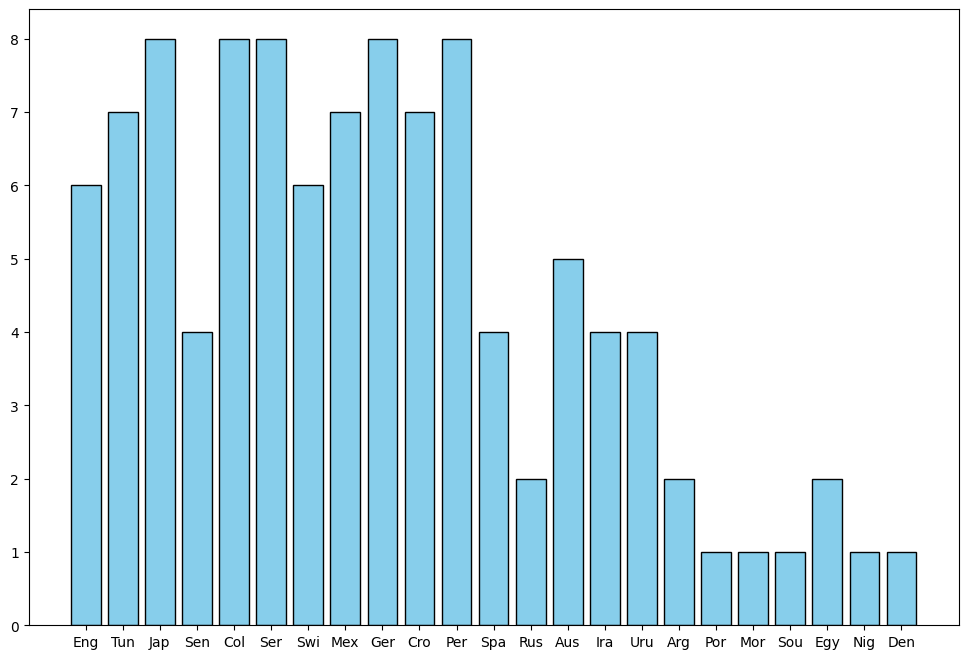

Eng
Tun
Jap
Col
Ser
Swi
Mex
Ger
Cro
Per
Aus


In [142]:
analisis(2018,superiores_2018)

In [ ]:
England -> Bueno
Switzerland -> Bueno
Mexico -> Bueno
Germany -> Bueno

Tunisia -> Malo
Croatia -> Malo
Japan -> Malo
Colombia -> Malo
Serbia -> Malo
Peru -> Malo

In [ ]:
Germany -> Bueno
Argentina -> Bueno
England -> Bueno
Netherland -> Bueno


Serbia -> Malo
South Korea -> Malo
Japan -> Malo
Canada -> Malo
Morraco -> Malo
Tunisia -> Malo
Ecuador -> Malo

In [162]:
qqq=1
qqq=max(qqq,3)
print(qqq)

3
